# Data Cleaning


In [4]:
#Import Libraries
import pandas as pd 
import os 
import csv 
import numpy as np 
from sqlalchemy import create_engine, inspect

In [5]:
# 1. Create a DataFrame for the Emission data
emissions_data_df=pd.read_csv('Clean_Emissions_data.csv',low_memory=False,index_col=[0])

In [6]:
emissions_data_df.reset_index(drop=True, inplace=True)

In [7]:
emissions_data_df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Y1990,Y1991,Y1992,Y1993,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),178.4682,187.5500,189.7600,190.8300,...,401.0680,402.5130,396.9210,393.0930,398.2870,383.3023,380.8767,371.2863,378.8870,389.6563
1,2,Afghanistan,5058,Enteric Fermentation,724413,Emissions (CO2eq) from CH4 (AR5),4997.1108,5251.4000,5313.2800,5343.2400,...,11229.9040,11270.3640,11113.7880,11006.6040,11152.0360,10732.4631,10664.5483,10396.0163,10608.8357,10910.3754
2,2,Afghanistan,5058,Enteric Fermentation,723113,Emissions (CO2eq) (AR5),4997.1108,5251.4000,5313.2800,5343.2400,...,11229.9040,11270.3640,11113.7880,11006.6040,11152.0360,10732.4631,10664.5483,10396.0163,10608.8357,10910.3754
3,2,Afghanistan,5059,Manure Management,7225,Emissions (CH4),8.5165,9.3445,9.6669,9.8348,...,26.5669,26.1599,26.0913,26.0859,26.3682,24.8209,24.6903,23.7001,24.2499,26.1252
4,2,Afghanistan,5059,Manure Management,7230,Emissions (N2O),0.3046,0.3044,0.2960,0.2903,...,0.3980,0.4177,0.4013,0.3868,0.3932,0.3945,0.3931,0.4013,0.4074,0.3654


In [8]:
# 2. Check the datatypes of your columns. 
emissions_data_df.dtypes

Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Y1990           float64
Y1991           float64
Y1992           float64
Y1993           float64
Y1994           float64
Y1995           float64
Y1996           float64
Y1997           float64
Y1998           float64
Y1999           float64
Y2000           float64
Y2001           float64
Y2002           float64
Y2003           float64
Y2004           float64
Y2005           float64
Y2006           float64
Y2007           float64
Y2008           float64
Y2009           float64
Y2010           float64
Y2011           float64
Y2012           float64
Y2013           float64
Y2014           float64
Y2015           float64
Y2016           float64
Y2017           float64
Y2018           float64
Y2019           float64
dtype: object

In [9]:
#display the columns
emissions_data_df.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997',
       'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005',
       'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013',
       'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019'],
      dtype='object')

In [10]:
# Row count
emissions_data_df.count()

Area Code       30188
Area            30188
Item Code       30188
Item            30188
Element Code    30188
Element         30188
Y1990           30188
Y1991           30188
Y1992           30188
Y1993           30188
Y1994           30188
Y1995           30188
Y1996           30188
Y1997           30188
Y1998           30188
Y1999           30188
Y2000           30188
Y2001           30188
Y2002           30188
Y2003           30188
Y2004           30188
Y2005           30188
Y2006           30188
Y2007           30188
Y2008           30188
Y2009           30188
Y2010           30188
Y2011           30188
Y2012           30188
Y2013           30188
Y2014           30188
Y2015           30188
Y2016           30188
Y2017           30188
Y2018           30188
Y2019           30188
dtype: int64

In [11]:
#checking for null values
emissions_data_df.isnull()

,Area Code,Area,Item Code,Item,Element Code,Element,Y1990,Y1991,Y1992,Y1993,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#Sum of null values
emissions_data_df.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Y1990           0
Y1991           0
Y1992           0
Y1993           0
Y1994           0
Y1995           0
Y1996           0
Y1997           0
Y1998           0
Y1999           0
Y2000           0
Y2001           0
Y2002           0
Y2003           0
Y2004           0
Y2005           0
Y2006           0
Y2007           0
Y2008           0
Y2009           0
Y2010           0
Y2011           0
Y2012           0
Y2013           0
Y2014           0
Y2015           0
Y2016           0
Y2017           0
Y2018           0
Y2019           0
dtype: int64

In [13]:
#Check for unique values
emissions_data_df.nunique().tolist()

[281,
 281,
 25,
 25,
 8,
 8,
 14212,
 14276,
 15387,
 15509,
 15511,
 15520,
 15367,
 15446,
 15478,
 15448,
 15376,
 14793,
 14942,
 15094,
 15016,
 15069,
 15098,
 15240,
 15064,
 15132,
 15185,
 15113,
 15207,
 15082,
 15186,
 15248,
 15108,
 15213,
 15095,
 15250]

In [53]:
for i in range (1990, 2020):
    col_year = "Y" +str(i) 
    df2 = emissions_data_df.rename({col_year : i}, axis=1)

In [63]:
df2 = emissions_data_df.rename(columns=lambda x: x.split("Y")[0])

In [64]:
df2.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', ''],
      dtype='object')

In [69]:
for i in range (1990, 2020):
    print(i)
    df3 = df2.rename({' ' : i}, axis=1)

1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [66]:
df3

,Area Code,Area,Item Code,Item,Element Code,Element,,,,,...,,,,,,,,,,
0,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),178.4682,187.5500,189.7600,190.8300,...,401.0680,402.5130,396.9210,393.0930,398.2870,383.3023,380.8767,371.2863,378.8870,389.6563
1,2,Afghanistan,5058,Enteric Fermentation,724413,Emissions (CO2eq) from CH4 (AR5),4997.1108,5251.4000,5313.2800,5343.2400,...,11229.9040,11270.3640,11113.7880,11006.6040,11152.0360,10732.4631,10664.5483,10396.0163,10608.8357,10910.3754
2,2,Afghanistan,5058,Enteric Fermentation,723113,Emissions (CO2eq) (AR5),4997.1108,5251.4000,5313.2800,5343.2400,...,11229.9040,11270.3640,11113.7880,11006.6040,11152.0360,10732.4631,10664.5483,10396.0163,10608.8357,10910.3754
3,2,Afghanistan,5059,Manure Management,7225,Emissions (CH4),8.5165,9.3445,9.6669,9.8348,...,26.5669,26.1599,26.0913,26.0859,26.3682,24.8209,24.6903,23.7001,24.2499,26.1252
4,2,Afghanistan,5059,Manure Management,7230,Emissions (N2O),0.3046,0.3044,0.2960,0.2903,...,0.3980,0.4177,0.4013,0.3868,0.3932,0.3945,0.3931,0.4013,0.4074,0.3654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30183,5873,OECD,6516,Land Use change,7230,Emissions (N2O),1.4119,1.4119,1.4119,1.4119,...,0.3298,1.8699,0.5001,1.4242,0.4180,1.2957,0.8834,0.7522,0.9253,1.0574
30184,5873,OECD,6516,Land Use change,7273,Emissions (CO2),306473.8942,306473.8942,306473.8942,307152.8342,...,260435.8387,159202.3883,159202.3883,159202.3883,159202.3883,159202.3883,209078.1221,209078.1221,209078.1221,209078.1221
30185,5873,OECD,6516,Land Use change,724413,Emissions (CO2eq) from CH4 (AR5),768.5391,768.5391,768.5391,768.5391,...,101.1322,573.4284,153.3618,436.7699,128.1795,397.3500,270.9106,230.6636,283.7454,324.2807
30186,5873,OECD,6516,Land Use change,724313,Emissions (CO2eq) from N2O (AR5),374.1567,374.1567,374.1567,374.1567,...,87.3914,495.5169,132.5246,377.4261,110.7638,343.3623,234.1021,199.3235,245.1931,280.2209


In [22]:
emissions_data_new_df = pd.melt(emissions_data_df, id_vars=["Area Code", "Area", "Item Code", "Item", "Element Code", "Element"], 
                  var_name="Year", value_name="Emission")

In [23]:
emissions_data_new_df

,Area Code,Area,Item Code,Item,Element Code,Element,Year,Emission
0,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),Y1990,178.4682
1,2,Afghanistan,5058,Enteric Fermentation,724413,Emissions (CO2eq) from CH4 (AR5),Y1990,4997.1108
2,2,Afghanistan,5058,Enteric Fermentation,723113,Emissions (CO2eq) (AR5),Y1990,4997.1108
3,2,Afghanistan,5059,Manure Management,7225,Emissions (CH4),Y1990,8.5165
4,2,Afghanistan,5059,Manure Management,7230,Emissions (N2O),Y1990,0.3046
...,...,...,...,...,...,...,...,...
905635,5873,OECD,6516,Land Use change,7230,Emissions (N2O),Y2019,1.0574
905636,5873,OECD,6516,Land Use change,7273,Emissions (CO2),Y2019,209078.1221
905637,5873,OECD,6516,Land Use change,724413,Emissions (CO2eq) from CH4 (AR5),Y2019,324.2807
905638,5873,OECD,6516,Land Use change,724313,Emissions (CO2eq) from N2O (AR5),Y2019,280.2209


In [16]:
emissions_data_new_df.head(100)

,Area Code,Area,Item Code,Item,Element Code,Element,Year,Emission
0,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),Y1990,178.4682
1,2,Afghanistan,5058,Enteric Fermentation,724413,Emissions (CO2eq) from CH4 (AR5),Y1990,4997.1108
2,2,Afghanistan,5058,Enteric Fermentation,723113,Emissions (CO2eq) (AR5),Y1990,4997.1108
3,2,Afghanistan,5059,Manure Management,7225,Emissions (CH4),Y1990,8.5165
4,2,Afghanistan,5059,Manure Management,7230,Emissions (N2O),Y1990,0.3046
...,...,...,...,...,...,...,...,...
95,2,Afghanistan,6995,Emissions on agricultural land,7273,Emissions (CO2),Y1990,274.7953
96,2,Afghanistan,6995,Emissions on agricultural land,724413,Emissions (CO2eq) from CH4 (AR5),Y1990,6010.1686
97,2,Afghanistan,6995,Emissions on agricultural land,724313,Emissions (CO2eq) from N2O (AR5),Y1990,2432.2316
98,2,Afghanistan,6995,Emissions on agricultural land,723113,Emissions (CO2eq) (AR5),Y1990,8717.1955


In [17]:
emissions_data_new_df.tail(20)

,Area Code,Area,Item Code,Item,Element Code,Element,Year,Emission
905620,5873,OECD,6995,Emissions on agricultural land,7236,Indirect emissions (N2O),Y2019,3.504458e+02
905621,5873,OECD,6995,Emissions on agricultural land,7230,Emissions (N2O),Y2019,1.911104e+03
905622,5873,OECD,6995,Emissions on agricultural land,7273,Emissions (CO2),Y2019,5.298083e+05
905623,5873,OECD,6995,Emissions on agricultural land,724413,Emissions (CO2eq) from CH4 (AR5),Y2019,7.545248e+05
905624,5873,OECD,6995,Emissions on agricultural land,724313,Emissions (CO2eq) from N2O (AR5),Y2019,5.064427e+05
905625,5873,OECD,6995,Emissions on agricultural land,723113,Emissions (CO2eq) (AR5),Y2019,1.790776e+06
905626,5873,OECD,6996,Farm-gate emissions,7225,Emissions (CH4),Y2019,2.693573e+04
905627,5873,OECD,6996,Farm-gate emissions,7234,Direct emissions (N2O),Y2019,1.167565e+03
905628,5873,OECD,6996,Farm-gate emissions,7236,Indirect emissions (N2O),Y2019,3.504458e+02
905629,5873,OECD,6996,Farm-gate emissions,7230,Emissions (N2O),Y2019,1.910047e+03


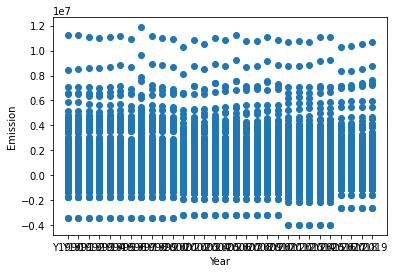

In [19]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.scatter(emissions_data_new_df.Year, emissions_data_new_df.Emission)
plt.xlabel('Year')
plt.ylabel('Emission')
plt.show()

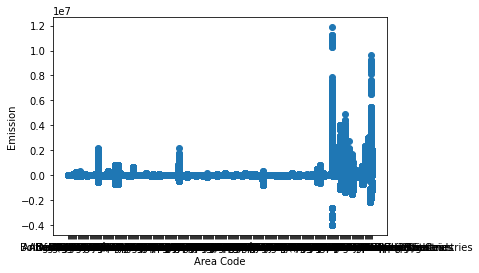

In [21]:
plt.scatter(emissions_data_new_df.Area, emissions_data_new_df.Emission)
plt.xlabel('Area Code')
plt.ylabel('Emission')
plt.show()

In [71]:
emissions_data_new_df['Year'] = emissions_data_new_df['Year'].str[1:]

In [72]:
emissions_data_new_df

,Area Code,Area,Item Code,Item,Element Code,Element,Year,Emission
0,2,Afghanistan,5058,Enteric Fermentation,7225,Emissions (CH4),1990,178.4682
1,2,Afghanistan,5058,Enteric Fermentation,724413,Emissions (CO2eq) from CH4 (AR5),1990,4997.1108
2,2,Afghanistan,5058,Enteric Fermentation,723113,Emissions (CO2eq) (AR5),1990,4997.1108
3,2,Afghanistan,5059,Manure Management,7225,Emissions (CH4),1990,8.5165
4,2,Afghanistan,5059,Manure Management,7230,Emissions (N2O),1990,0.3046
...,...,...,...,...,...,...,...,...
905635,5873,OECD,6516,Land Use change,7230,Emissions (N2O),2019,1.0574
905636,5873,OECD,6516,Land Use change,7273,Emissions (CO2),2019,209078.1221
905637,5873,OECD,6516,Land Use change,724413,Emissions (CO2eq) from CH4 (AR5),2019,324.2807
905638,5873,OECD,6516,Land Use change,724313,Emissions (CO2eq) from N2O (AR5),2019,280.2209


In [84]:
emissions_data_new_df['Year'] = emissions_data_new_df['Year'].astype(int)

In [85]:
emissions_data_new_df.dtypes

Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year              int32
Emission        float64
dtype: object

In [86]:
X = emissions_data_new_df.Year

In [87]:
X = emissions_data_new_df.Year.values.reshape(-1, 1)

In [88]:
X

array([[1990],
       [1990],
       [1990],
       ...,
       [2019],
       [2019],
       [2019]])

In [89]:
X.shape

(905640, 1)

In [90]:
y = emissions_data_new_df.Emission

In [91]:
model = LinearRegression()

In [92]:
emissions_data_new_df.dtypes

Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year              int32
Emission        float64
dtype: object

In [93]:
model.fit(X, y)

LinearRegression()

In [94]:
y_pred = model.predict(X)
print(y_pred.shape)

(905640,)


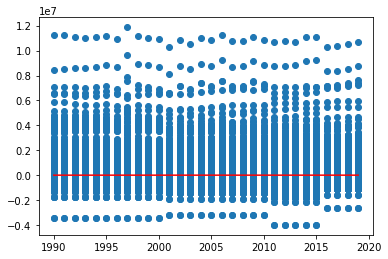

In [95]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()